In [1]:
!pip install mysql.connector

In [0]:
import mysql.connector

In [0]:
conn = mysql.connector.connect(
         user='foouser',
         password='F88Pa%%**',
         host='134.209.144.239',
         database='stocksdb')

In [4]:
print(conn)

In [0]:
cursor = conn.cursor() 

In [0]:
for (table_name,) in cursor:
        print(table_name)

In [49]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

/: ['lib', 'proc', 'bin', 'media', 'opt', 'usr', 'dev', 'sys', 'lib64', 'boot', 'var', 'srv', 'run', 'etc', 'sbin', 'root', 'home', 'mnt', 'tmp', '.dockerenv', 'tools', 'datalab', 'swift', 'content', 'lib32']
/content: ['.config', 'sample_data']


In [50]:
df = pd.read_sql_query(""" SELECT * FROM interview""", conn)
df.head()

,isin,insertion_datetime,datetime,open,high,low,close,volume,open_interest
0,INE545A01016,NaT,2018-01-01 09:15:00,2419.0,2436.00,2408.90,2435.25,10281,NaN
1,INE545A01016,NaT,2018-01-01 09:16:00,2435.0,2440.00,2426.45,2439.00,13315,NaN
2,INE545A01016,NaT,2018-01-01 09:17:00,2439.7,2439.70,2422.10,2424.95,3760,NaN
3,INE545A01016,NaT,2018-01-01 09:18:00,2420.0,2424.50,2386.50,2395.00,11653,NaN
4,INE545A01016,NaT,2018-01-01 09:19:00,2395.0,2413.95,2394.70,2409.85,7744,NaN


In [0]:
df = pd.read_sql_query(""" SELECT isin, datetime, open, high, low, close, volume FROM interview""", conn)


In [0]:
df.to_csv('stock.csv')

In [57]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
isin        500000 non-null object
datetime    500000 non-null datetime64[ns]
open        500000 non-null float64
high        500000 non-null float64
low         500000 non-null float64
close       500000 non-null float64
volume      500000 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 26.7+ MB


,isin,datetime,open,high,low,close,volume
0,INE545A01016,2018-01-01 09:15:00,2419.0,2436.00,2408.90,2435.25,10281
1,INE545A01016,2018-01-01 09:16:00,2435.0,2440.00,2426.45,2439.00,13315
2,INE545A01016,2018-01-01 09:17:00,2439.7,2439.70,2422.10,2424.95,3760
3,INE545A01016,2018-01-01 09:18:00,2420.0,2424.50,2386.50,2395.00,11653
4,INE545A01016,2018-01-01 09:19:00,2395.0,2413.95,2394.70,2409.85,7744


In [59]:
df.describe()

,open,high,low,close,volume
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,1483.673727,1484.529598,1482.876855,1483.721753,407.884840
std,1231.689627,1232.654749,1230.771130,1231.747869,2228.894209
min,9.000000,9.000000,9.000000,9.000000,0.000000
25%,587.750000,587.950000,587.500000,587.750000,0.000000
50%,891.600000,892.100000,891.000000,891.525000,0.000000
75%,2365.000000,2365.012500,2365.000000,2365.000000,107.000000
max,4927.950000,4953.900000,4855.400000,4928.000000,365036.000000


In [62]:
display = pd.read_sql_query("""
SELECT isin, COUNT(*)
FROM interview
GROUP BY isin
""", conn)
display

,isin,COUNT(*)
0,dummy1611,25780
1,dummy3751,39827
2,dummy3811,5928
3,INE221B01012,111586
4,INE265F01028,110870
5,INE492A01029,44871
6,INE545A01016,161138


In [0]:
df = pd.read_csv('stock.csv')

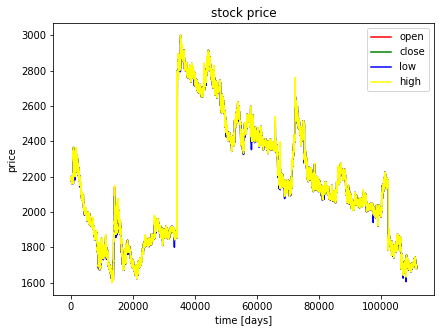

In [90]:
#df.loc[df['column_name'] == some_value]
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df['isin'] == 'INE221B01012'].open.values, color='red', label='open')
plt.plot(df[df['isin'] == 'INE221B01012'].close.values, color='green', label='close')
plt.plot(df[df['isin'] == 'INE221B01012'].low.values, color='blue', label='low')
plt.plot(df[df['isin'] == 'INE221B01012'].high.values, color='yellow', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

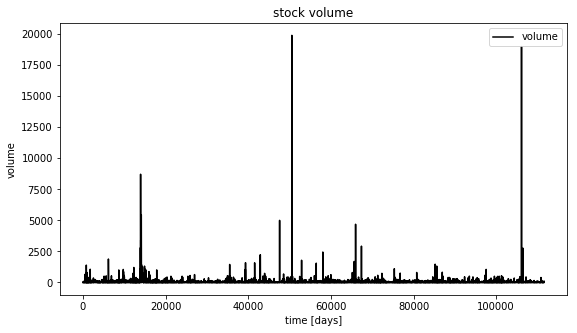

In [86]:
#df.loc[df['column_name'] == some_value]
plt.figure(figsize=(20, 5));
plt.subplot(1,2,2);
plt.plot(df[df['isin'] == 'INE221B01012'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');


In [0]:
df = df[['isin', 'open', 'close', 'high', 'low', 'volume']]

In [106]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

# choose one stock
df_stock = df[df['isin'] == 'INE221B01012'].copy()
df_stock.drop(['isin'],1,inplace=True)
df_stock.drop(['volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  ['open', 'close', 'high', 'low']
x_train.shape =  (89252, 19, 4)
y_train.shape =  (89252, 4)
x_valid.shape =  (11157, 19, 4)
y_valid.shape =  (11157, 4)
x_test.shape =  (11157, 19, 4)
y_test.shape =  (11157, 4)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


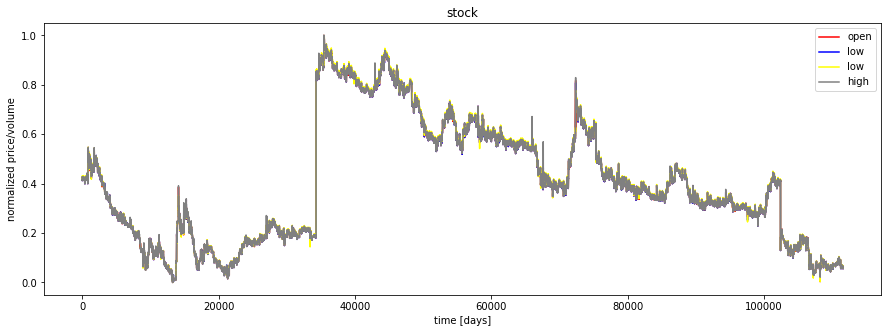

In [107]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='blue', label='low')
plt.plot(df_stock_norm.low.values, color='yellow', label='low')
plt.plot(df_stock_norm.high.values, color='grey', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [115]:
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 50 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

# use Basic LSTM Cell 
#layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
#          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})
    


0.00 epochs: MSE train/valid = 0.042317/0.026141
5.00 epochs: MSE train/valid = 0.000016/0.000009
10.00 epochs: MSE train/valid = 0.000256/0.000194
15.00 epochs: MSE train/valid = 0.000089/0.000093
20.00 epochs: MSE train/valid = 13.657666/14.459705
25.00 epochs: MSE train/valid = 0.437654/0.305465
30.00 epochs: MSE train/valid = 0.017835/0.016631
35.00 epochs: MSE train/valid = 0.002142/0.001662
40.00 epochs: MSE train/valid = 0.000347/0.000320
45.00 epochs: MSE train/valid = 0.000214/0.000219
50.00 epochs: MSE train/valid = 0.001222/0.001707


In [116]:
y_train.shape

(89252, 4)

correct sign prediction for close - open price for train/valid/test: 0.06/0.03/0.03


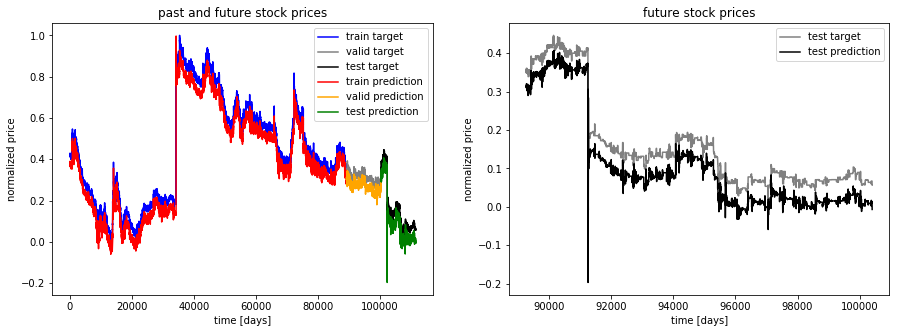

In [117]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='grey', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='black', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))